## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob(r"C:\Users\DEBADIP CHAKRABORTY\Downloads\Malaria-Detection-master\Malaria-Detection-master\Dataset\Dataset\Train")

In [6]:
folders

['C:\\Users\\DEBADIP CHAKRABORTY\\Downloads\\Malaria-Detection-master\\Malaria-Detection-master\\Dataset\\Dataset\\Train']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"C:\Users\DEBADIP CHAKRABORTY\Downloads\Malaria-Detection-master\Malaria-Detection-master\Dataset\Dataset\Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory(r"C:\Users\DEBADIP CHAKRABORTY\Downloads\Malaria-Detection-master\Malaria-Detection-master\Dataset\Dataset\Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\DEBADI~1\AppData\Local\Temp/ipykernel_12408/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 33s 2s/step - loss: 1.4564 - accuracy: 0.4808 - val_loss: 0.6399 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 25s 2s/step - loss: 0.6977 - accuracy: 0.5337 - val_loss: 0.6632 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 25s 2s/step - loss: 0.6754 - accuracy: 0.5745 - val_loss: 0.6845 - val_accuracy: 0.6194
Epoch 4/50
13/13 [==============================] - 26s 2s/step - loss: 0.6516 - accuracy: 0.5962 - val_loss: 0.6949 - val_accuracy: 0.4179
Epoch 5/50
13/13 [==============================] - 25s 2s/step - loss: 0.5696 - accuracy: 0.7139 - val_loss: 0.7634 - val_accuracy: 0.4701
Epoch 6/50
13/13 [==============================] - 27s 2s/step - loss: 0.5099 - accuracy: 0.7452 - val_loss: 0.7989 - val_accuracy: 0.3657
Epoch 7/50
13/13 [==============================] - 26s 2s/step - loss: 0.4753 - accuracy: 0.7524 - val_loss: 0.9067 - val_accuracy: 0.4478
Epoch 8/50
13/13 [==

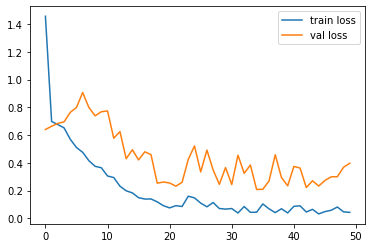

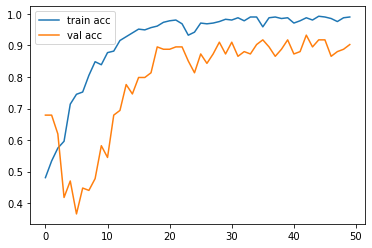

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [20]:

y_pred = model.predict(test_set)


5/5 [==============================] - 4s 583ms/step


In [21]:
y_pred

array([[1.00000000e+00, 5.72425307e-09],
       [4.11632610e-03, 9.95883644e-01],
       [1.05496089e-03, 9.98945057e-01],
       [9.99961019e-01, 3.89792913e-05],
       [9.99984264e-01, 1.56911501e-05],
       [7.30392197e-03, 9.92696047e-01],
       [9.99999046e-01, 9.33339606e-07],
       [1.12780742e-02, 9.88721967e-01],
       [2.42490298e-03, 9.97575104e-01],
       [9.99893546e-01, 1.06474145e-04],
       [1.00000000e+00, 1.29773916e-08],
       [1.00000000e+00, 9.20522573e-32],
       [1.00000000e+00, 1.19252533e-11],
       [1.87545754e-02, 9.81245399e-01],
       [2.39866064e-03, 9.97601330e-01],
       [9.99997735e-01, 2.28146564e-06],
       [1.00000000e+00, 8.93730778e-09],
       [2.05536466e-03, 9.97944653e-01],
       [3.27538699e-03, 9.96724665e-01],
       [3.83787788e-03, 9.96162176e-01],
       [4.12093615e-03, 9.95879054e-01],
       [9.99985695e-01, 1.42965437e-05],
       [1.00000000e+00, 1.32666469e-17],
       [9.99999523e-01, 4.28039414e-07],
       [1.981956

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_vgg19.h5')

In [28]:
img=image.load_img(r"C:\Users\DEBADIP CHAKRABORTY\Downloads\Malaria-Detection-master\Malaria-Detection-master\Dataset\Dataset\Test\Uninfected\C3thin_original_IMG_20150608_163002_cell_34.png",target_size=(224,224))



In [29]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

1/1 [==============================] - 0s 183ms/step


array([[0., 1.]], dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 54ms/step


In [35]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
